Group By
========



In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa

## Introduction



## Group by basics



### How to do it



In [2]:
df = pd.DataFrame([
    ["group_a", 0],
    ["group_a", 2],
    ["group_b", 1],
    ["group_b", 3],
    ["group_b", 5],
], columns=["group", "value"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,group,value
0,group_a,0
1,group_a,2
2,group_b,1
3,group_b,3
4,group_b,5


In [3]:
df.groupby("group").sum()

,value
group,
group_a,2
group_b,9


In [4]:
df.groupby("group").agg("sum")

,value
group,
group_a,2
group_b,9


In [5]:
df.groupby("group").transform("sum")

,value
0,2
1,2
2,9
3,9
4,9


In [6]:
df[["value"]].div(df.groupby("group").transform("sum"))

,value
0,0.0
1,1.0
2,0.111111
3,0.333333
4,0.555556


In [7]:
df.groupby("group", as_index=False).sum()

,group,value
0,group_a,2
1,group_b,9


In [8]:
df

,group,value
0,group_a,0
1,group_a,2
2,group_b,1
3,group_b,3
4,group_b,5


In [9]:
df.groupby("group").sum()

,value
group,
group_a,2
group_b,9


In [10]:
df.groupby("group").min()

,value
group,
group_a,0
group_b,1


In [11]:
df.groupby("group").agg(sum_of_value=pd.NamedAgg(column="value", aggfunc="sum"))

,sum_of_value
group,
group_a,2
group_b,9


### There's more&#x2026;



In [12]:
df.groupby("group").max()

,value
group,
group_a,2
group_b,5


In [13]:
df.groupby("group").agg("max")

,value
group,
group_a,2
group_b,5


In [14]:
df.groupby("group").transform("max")

,value
0,2
1,2
2,5
3,5
4,5


## Grouping and calculating multiple columns



### How to do it



In [15]:
df = pd.DataFrame([
    ["North", "Widget A", "Jan", 10, 2],
    ["North", "Widget B", "Jan", 4, 0],
    ["South", "Widget A", "Jan", 8, 3],
    ["South", "Widget B", "Jan", 12, 8],
    ["North", "Widget A", "Feb", 3, 0],
    ["North", "Widget B", "Feb", 7, 0],
    ["South", "Widget A", "Feb", 11, 2],
    ["South", "Widget B", "Feb", 13, 4],
], columns=["region", "widget", "month", "sales", "returns"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,region,widget,month,sales,returns
0,North,Widget A,Jan,10,2
1,North,Widget B,Jan,4,0
2,South,Widget A,Jan,8,3
3,South,Widget B,Jan,12,8
4,North,Widget A,Feb,3,0
5,North,Widget B,Feb,7,0
6,South,Widget A,Feb,11,2
7,South,Widget B,Feb,13,4


In [16]:
df.groupby("widget").sum()

,region,month,sales,returns
widget,,,,
Widget A,NorthSouthNorthSouth,JanJanFebFeb,32,7
Widget B,NorthSouthNorthSouth,JanJanFebFeb,36,12


In [17]:
"North" + "South" + "North" + "South"

'NorthSouthNorthSouth'

In [18]:
df.groupby("widget")[["sales", "returns"]].agg("sum")

,sales,returns
widget,,
Widget A,32,7
Widget B,36,12


In [19]:
df.groupby("widget").agg(
    sales_total=pd.NamedAgg(column="sales", aggfunc="sum"),
    returns_total=pd.NamedAgg(column="returns", aggfunc="sum"),
)

,sales_total,returns_total
widget,,
Widget A,32,7
Widget B,36,12


In [20]:
df.groupby(["widget", "region"]).agg(
    sales_total=pd.NamedAgg("sales", "sum"),
    returns_total=pd.NamedAgg("returns", "sum"),
)

sales_total  returns_total
widget   region                            
Widget A North            13              2
         South            19              5
Widget B North            11              0
         South            25             12

In [21]:
df.groupby(["widget", "region"]).agg(
    sales_total=pd.NamedAgg("sales", "sum"),
    returns_total=pd.NamedAgg("returns", "sum"),
    sales_min=pd.NamedAgg("sales", "min"),
    returns_min=pd.NamedAgg("returns", "min"),
    sales_mean=pd.NamedAgg("sales", "mean"),
    returns_mean=pd.NamedAgg("returns", "mean"),
)

sales_total  returns_total  sales_min  returns_min  \
widget   region                                                       
Widget A North            13              2          3            0   
         South            19              5          8            2   
Widget B North            11              0          4            0   
         South            25             12         12            4   

                 sales_mean  returns_mean  
widget   region                            
Widget A North          6.5           1.0  
         South          9.5           2.5  
Widget B North          5.5           0.0  
         South         12.5           6.0

### There's more&#x2026;



In [22]:
pd.Series([0, 1, 1]).mode()

0    1
dtype: int64

In [23]:
pd.Series([0, 1, 1, 2, 2]).mode()

0    1
1    2
dtype: int64

In [24]:
df = pd.DataFrame([
    ["group_a", 42],
    ["group_a", 555],
    ["group_a", 42],
    ["group_a", 555],
    ["group_b", 0],
], columns=["group", "value"])

df

,group,value
0,group_a,42
1,group_a,555
2,group_a,42
3,group_a,555
4,group_b,0


In [25]:
pd.Series([[42, 555], 0], index=pd.Index(["group_a", "group_b"], name="group"))

group
group_a    [42, 555]
group_b            0
dtype: object

In [26]:
pd.Series(
    [42, 555, 0],
    index=pd.Index(["group_a", "group_a", "group_b"], name="group")
)

group
group_a     42
group_a    555
group_b      0
dtype: int64

In [27]:
def scalar_or_list_mode(ser: pd.Series):
    result = ser.mode()
    if len(result) > 1:
        return result.tolist()
    elif len(result) == 1:
        return result.iloc[0]

    return pd.NA

def scalar_or_bust_mode(ser: pd.Series):
    result = ser.mode()
    if len(result) == 0:
        return pd.NA

    return result.iloc[0]

In [28]:
df.groupby("group").agg(
    scalar_or_list=pd.NamedAgg(column="value", aggfunc=scalar_or_list_mode),
    scalar_or_bust=pd.NamedAgg(column="value", aggfunc=scalar_or_bust_mode),
)

,scalar_or_list,scalar_or_bust
group,,
group_a,"[42, 555]",42
group_b,0,0


## Group by apply



### How to do it



In [29]:
df = pd.DataFrame([
    ["group_a", 42],
    ["group_a", 555],
    ["group_a", 42],
    ["group_a", 555],
    ["group_b", 0],
], columns=["group", "value"])
df = df.convert_dtypes(dtype_backend="numpy_nullable")

df

,group,value
0,group_a,42
1,group_a,555
2,group_a,42
3,group_a,555
4,group_b,0


In [30]:
pd.Series(
    [42, 555, 0],
    index=pd.Index(["group_a", "group_a", "group_b"], name="group"),
    dtype=pd.Int64Dtype(),
)

group
group_a     42
group_a    555
group_b      0
dtype: Int64

In [31]:
def mode_for_apply(df: pd.DataFrame):
    return df["value"].mode()

df.groupby("group").apply(mode_for_apply, include_groups=False)

group     
group_a  0     42
         1    555
group_b  0      0
Name: value, dtype: Int64

In [32]:
def mode_for_apply(df: pd.DataFrame):
    print(f"\nThe data passed to apply is:\n{df}")
    return df["value"].mode()

df.groupby("group").apply(mode_for_apply, include_groups=False)


The data passed to apply is:
   value
0     42
1    555
2     42
3    555

The data passed to apply is:
   value
4      0


group     
group_a  0     42
         1    555
group_b  0      0
Name: value, dtype: Int64

In [33]:
def sum_values(df: pd.DataFrame):
    return df["value"].sum()

df.groupby("group").apply(sum_values, include_groups=False)

group
group_a    1194
group_b       0
dtype: int64

## Window operations



### How to do it



In [34]:
ser = pd.Series([0, 1, 2, 4, 8, 16], dtype=pd.Int64Dtype())
ser

0     0
1     1
2     2
3     4
4     8
5    16
dtype: Int64

In [35]:
ser.rolling(2).sum()

0     NaN
1     1.0
2     3.0
3     6.0
4    12.0
5    24.0
dtype: float64

In [36]:
ser.rolling(2).sum().astype(pd.Int64Dtype())

0    <NA>
1       1
2       3
3       6
4      12
5      24
dtype: Int64

In [37]:
ser.rolling(2, min_periods=1).sum().astype(pd.Int64Dtype())

0     0
1     1
2     3
3     6
4    12
5    24
dtype: Int64

In [38]:
ser.rolling(3).sum().astype(pd.Int64Dtype())

0    <NA>
1    <NA>
2       3
3       7
4      14
5      28
dtype: Int64

In [39]:
ser.rolling(3, center=True).sum().astype(pd.Int64Dtype())

0    <NA>
1       3
2       7
3      14
4      28
5    <NA>
dtype: Int64

In [40]:
ser.expanding().mean().astype(pd.Float64Dtype())

0         0.0
1         0.5
2         1.0
3        1.75
4         3.0
5    5.166667
dtype: Float64

### There's more&#x2026;



In [41]:
df = pd.read_csv(
    "data/NVDA.csv",
    usecols=["Date", "Close"],
    parse_dates=["Date"],
    dtype_backend="numpy_nullable",
).set_index("Date")
df

,Close
Date,
2020-01-02,59.977501
2020-01-03,59.017502
2020-01-06,59.264999
2020-01-07,59.982498
2020-01-08,60.095001
...,...
2023-12-22,488.299988
2023-12-26,492.790009
2023-12-27,494.170013


<Axes: xlabel='Date'>

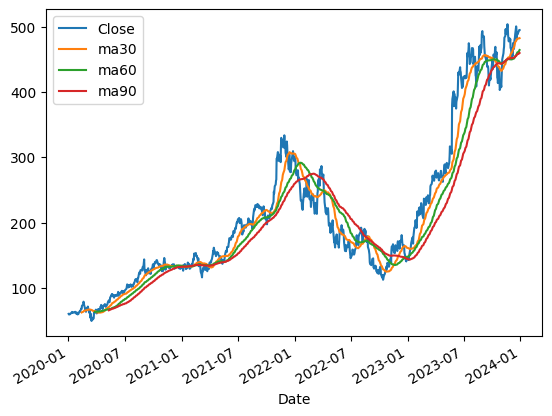

In [42]:
import matplotlib.pyplot as plt
plt.ion()

df.assign(
    ma30=df["Close"].rolling(30).mean().astype(pd.Float64Dtype()),
    ma60=df["Close"].rolling(60).mean().astype(pd.Float64Dtype()),
    ma90=df["Close"].rolling(90).mean().astype(pd.Float64Dtype()),
).plot()

In [43]:
df.groupby(pd.Grouper(freq="YS")).expanding().agg(
    ["min", "max", "mean"]
)

Close                        
                              min         max        mean
Date       Date                                          
2020-01-01 2020-01-02   59.977501   59.977501   59.977501
           2020-01-03   59.017502   59.977501   59.497501
           2020-01-06   59.017502   59.977501   59.420001
           2020-01-07   59.017502   59.982498   59.560625
           2020-01-08   59.017502   60.095001   59.667500
...                           ...         ...         ...
2023-01-01 2023-12-22  142.649994  504.089996  363.600610
           2023-12-26  142.649994  504.089996  364.123644
           2023-12-27  142.649994  504.089996  364.648024
           2023-12-28  142.649994  504.089996  365.172410
           2023-12-29  142.649994  504.089996  365.692600

[1006 rows x 3 columns]

<Axes: xlabel='Date'>

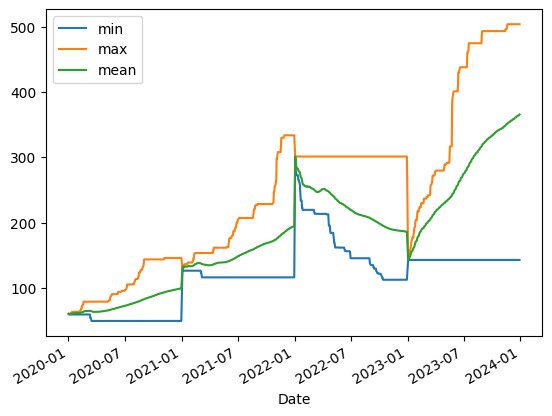

In [44]:
df.groupby(pd.Grouper(freq="YS")).expanding().agg(
    ["min", "max", "mean"]
).droplevel(axis=1, level=0).reset_index(level=0, drop=True).plot()

<Axes: xlabel='Date'>

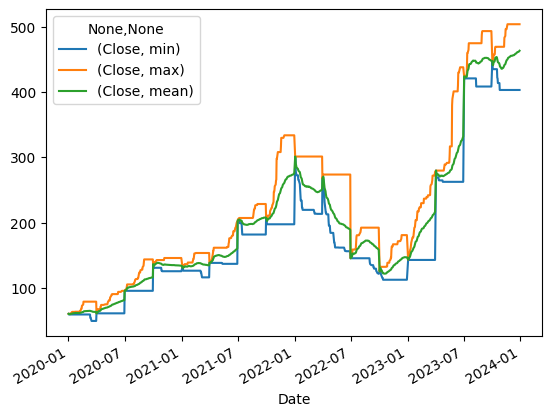

In [45]:
df.groupby(pd.Grouper(freq="QS")).expanding().agg(
    ["min", "max", "mean"]
).reset_index(level=0, drop=True).plot()

<Axes: xlabel='Date'>

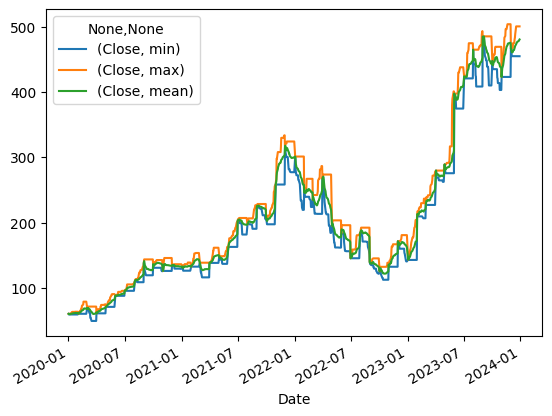

In [46]:
df.groupby(pd.Grouper(freq="MS")).expanding().agg(
    ["min", "max", "mean"]
).reset_index(level=0, drop=True).plot()

## Selecting the highest rated movies by year



### How to do it



In [47]:
df = pd.read_csv(
    "data/movie.csv",
    usecols=["movie_title", "title_year", "imdb_score"],
    dtype_backend="numpy_nullable",
)

df

,movie_title,title_year,imdb_score
0,Avatar,2009.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Spectre,2015.0,6.8
3,The Dark Knight Rises,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens,<NA>,7.1
...,...,...,...
4911,Signed Sealed Delivered,2013.0,7.7
4912,The Following,<NA>,7.5
4913,A Plague So Pleasant,2013.0,6.3
4914,Shanghai Calling,2012.0,6.3


In [48]:
df["title_year"] = df["title_year"].astype(pd.Int16Dtype())
df.head(3)

,movie_title,title_year,imdb_score
0,Avatar,2009,7.9
1,Pirates of the Caribbean: At World's End,2007,7.1
2,Spectre,2015,6.8


In [49]:
df = pd.read_csv(
    "data/movie.csv",
    usecols=["movie_title", "title_year", "imdb_score"],
    dtype={"title_year": pd.Int16Dtype()},
    dtype_backend="numpy_nullable",
)
df.head(3)

,movie_title,title_year,imdb_score
0,Avatar,2009,7.9
1,Pirates of the Caribbean: At World's End,2007,7.1
2,Spectre,2015,6.8


In [50]:
df.sort_values(["title_year", "imdb_score"]).groupby(
    "title_year"
)[["movie_title"]].agg(top_rated_movie=pd.NamedAgg("movie_title", "last"))

,top_rated_movie
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,Django Unchained
2013,"Batman: The Dark Knight Returns, Part 2"
2014,Butterfly Girl


In [51]:
df.set_index("movie_title").groupby("title_year").agg(
    top_rated_movie=pd.NamedAgg("imdb_score", "idxmax")
)

,top_rated_movie
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,The Dark Knight Rises
2013,"Batman: The Dark Knight Returns, Part 2"
2014,Queen of the Mountains


In [52]:
df[df["movie_title"].isin({
    "Django Unchained",
    "The Dark Knight Rises",
    "Butterfly Girl",
    "Queen of the Mountains",
})]

,movie_title,title_year,imdb_score
3,The Dark Knight Rises,2012,8.5
293,Django Unchained,2012,8.5
4369,Queen of the Mountains,2014,8.7
4804,Butterfly Girl,2014,8.7


In [53]:
def top_rated(df: pd.DataFrame):
    top_rating = df["imdb_score"].max()
    top_rated = df[df["imdb_score"] == top_rating]["movie_title"].unique()

    if len(top_rated) == 1:
        return top_rated[0]
    else:
        return top_rated

df.groupby("title_year").apply(
    top_rated, include_groups=False
).to_frame().rename(columns={0: "top_rated_movie(s)"})

,top_rated_movie(s)
title_year,
1916,Intolerance: Love's Struggle Throughout the Ages
1920,Over the Hill to the Poorhouse
1925,The Big Parade
1927,Metropolis
1929,Pandora's Box
...,...
2012,"[The Dark Knight Rises, Django Unchained]"
2013,"Batman: The Dark Knight Returns, Part 2"
2014,"[Queen of the Mountains, Butterfly Girl]"


## Comparing the best hitter in baseball across years



### How to do it



In [54]:
df = pd.read_parquet("data/mlb_batting_lines.parquet")

df

,year,game,starttime,visiting_team,home_team,id,side,pos,seq,ab,...,sh,sf,hpb,bb,ibb,k,sb,cs,gidp,int
0,2015,ANA201504100,7:12PM,KCA,ANA,escoa003,0,1,1,3,...,1,0,0,1,0,0,0,0,0,0
1,2015,ANA201504100,7:12PM,KCA,ANA,mousm001,0,2,1,3,...,0,0,2,0,0,0,0,0,0,0
2,2015,ANA201504100,7:12PM,KCA,ANA,cainl001,0,3,1,4,...,0,0,0,1,0,2,0,0,0,0
3,2015,ANA201504100,7:12PM,KCA,ANA,hosme001,0,4,1,5,...,0,0,0,0,0,1,0,0,0,0
4,2015,ANA201504100,7:12PM,KCA,ANA,morak001,0,5,1,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630995,2013,WAS201309222,7:06PM,MIA,WAS,lombs002,1,9,2,1,...,0,0,0,0,0,0,0,0,0,0
1630996,2013,WAS201309222,7:06PM,MIA,WAS,stamc001,1,9,3,0,...,0,0,0,0,0,0,0,0,0,0
1630997,2013,WAS201309222,7:06PM,MIA,WAS,clipt001,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
1630998,2013,WAS201309222,7:06PM,MIA,WAS,tracc001,1,9,5,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
bal = df[df["game"] == "BAL201504100"]
bal.head()

,year,game,starttime,visiting_team,home_team,id,side,pos,seq,ab,...,sh,sf,hpb,bb,ibb,k,sb,cs,gidp,int
2383,2015,BAL201504100,3:11PM,TOR,BAL,reyej001,0,1,1,5,...,0,1,0,0,0,1,0,0,0,0
2384,2015,BAL201504100,3:11PM,TOR,BAL,pompd001,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
2385,2015,BAL201504100,3:11PM,TOR,BAL,bautj002,0,3,1,3,...,0,0,0,1,0,0,0,0,0,0
2386,2015,BAL201504100,3:11PM,TOR,BAL,tolls001,0,3,2,1,...,0,0,0,0,0,1,0,0,0,0
2387,2015,BAL201504100,3:11PM,TOR,BAL,encae001,0,4,1,4,...,0,1,0,0,0,2,0,0,0,0


In [56]:
bal[["ab", "h", "hr"]].sum()

ab    75
h     29
hr     2
dtype: Int64

In [57]:
df.groupby(["year", "id"]).agg(
    total_ab=pd.NamedAgg(column="ab", aggfunc="sum"),
    total_h=pd.NamedAgg(column="h", aggfunc="sum"),
)

total_ab  total_h
year id                         
2000 abboj002       215       59
     abbok002       157       34
     abbop001         5        2
     abreb001       576      182
     acevj001         1        0
...                 ...      ...
2023 zavas001       175       30
     zerpa001         0        0
     zimmb002         0        0
     zunig001         0        0
     zunim001       124       22

[31508 rows x 2 columns]

In [58]:
(
    df.groupby(["year", "id"]).agg(
        total_ab=pd.NamedAgg(column="ab", aggfunc="sum"),
        total_h=pd.NamedAgg(column="h", aggfunc="sum"))
    .assign(avg=lambda x: x["total_h"] / x["total_ab"])
    .drop(columns=["total_ab", "total_h"])
)

avg
year id                
2000 abboj002  0.274419
     abbok002  0.216561
     abbop001       0.4
     abreb001  0.315972
     acevj001       0.0
...                 ...
2023 zavas001  0.171429
     zerpa001       NaN
     zimmb002       NaN
     zunig001       NaN
     zunim001  0.177419

[31508 rows x 1 columns]

In [59]:
(
    df.groupby(["year", "id"]).agg(
        total_ab=pd.NamedAgg(column="ab", aggfunc="sum"),
        total_h=pd.NamedAgg(column="h", aggfunc="sum"))
    .loc[lambda df: df["total_ab"] > 400]
    .assign(avg=lambda x: x["total_h"] / x["total_ab"])
    .drop(columns=["total_ab", "total_h"])
)

avg
year id                
2000 abreb001  0.315972
     alfoe001  0.323529
     alicl001  0.294444
     alomr001  0.309836
     aloum001  0.354626
...                 ...
2023 walkc002  0.257732
     walkj003   0.27619
     wittb002  0.276131
     yelic001  0.278182
     yoshm002  0.288641

[4147 rows x 1 columns]

In [60]:
averages = (
    df.groupby(["year", "id"]).agg(
        total_ab=pd.NamedAgg(column="ab", aggfunc="sum"),
        total_h=pd.NamedAgg(column="h", aggfunc="sum"))
    .loc[lambda df: df["total_ab"] > 400]
    .assign(avg=lambda x: x["total_h"] / x["total_ab"])
    .drop(columns=["total_ab", "total_h"])
)

averages.groupby("year").agg(
    league_mean_avg=pd.NamedAgg(column="avg", aggfunc="mean"),
    league_max_avg=pd.NamedAgg(column="avg", aggfunc="max"),
    batting_champion=pd.NamedAgg(column="avg", aggfunc="idxmax"),
)

,league_mean_avg,league_max_avg,batting_champion
year,,,
2000,0.284512,0.372414,"(2000, heltt001)"
2001,0.277945,0.350101,"(2001, walkl001)"
2002,0.275713,0.369727,"(2002, bondb001)"
2003,0.279268,0.358714,"(2003, pujoa001)"
2004,0.281307,0.372159,"(2004, suzui001)"
2005,0.27735,0.335017,"(2005, lee-d002)"
2006,0.283609,0.347409,"(2006, mauej001)"
2007,0.281354,0.363025,"(2007, ordom001)"
2008,0.277991,0.364465,"(2008, jonec004)"


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion()

In [62]:
sns_df = averages.reset_index()
years = sns_df["year"].unique()
cat = pd.CategoricalDtype(sorted(years), ordered=True)
sns_df["year"] = sns_df["year"].astype(cat)

sns_df

,year,id,avg
0,2000,abreb001,0.315972
1,2000,alfoe001,0.323529
2,2000,alicl001,0.294444
3,2000,alomr001,0.309836
4,2000,aloum001,0.354626
...,...,...,...
4142,2023,walkc002,0.257732
4143,2023,walkj003,0.27619
4144,2023,wittb002,0.276131
4145,2023,yelic001,0.278182


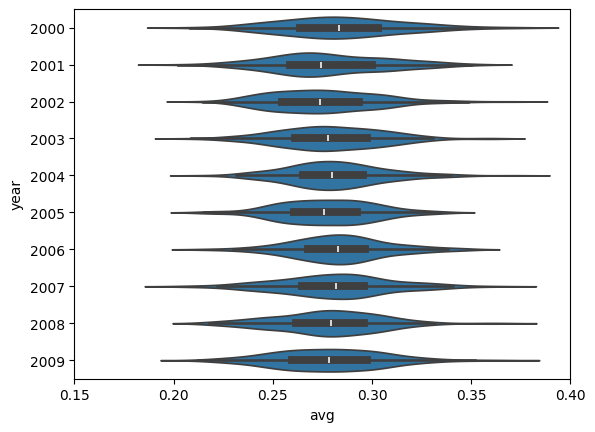

In [63]:
mask = (sns_df["year"] >= 2000) & (sns_df["year"] < 2010)
fig, ax = plt.subplots()
sns.violinplot(
    data=sns_df[mask],
    ax=ax,
    x="avg",
    y="year",
    order=sns_df.loc[mask, "year"].unique(),
)
ax.set_xlim(0.15, 0.4)
plt.show()

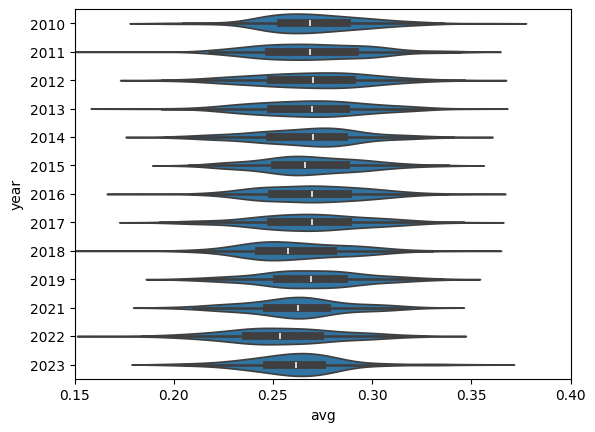

In [64]:
mask = sns_df["year"] >= 2010
fig, ax = plt.subplots()
sns.violinplot(
    data=sns_df[mask],
    ax=ax,
    x="avg",
    y="year",
    order=sns_df.loc[mask, "year"].unique(),
)
ax.set_xlim(0.15, 0.4)
plt.show()

In [65]:
def normalize(ser: pd.Series) -> pd.Series:
    return (ser - ser.mean()) / ser.std()

(
    averages.assign(
        normalized_avg=averages.groupby("year").transform(normalize)
    )
    .groupby("year").agg(
        league_mean_avg=pd.NamedAgg(column="avg", aggfunc="mean"),
        league_max_avg=pd.NamedAgg(column="avg", aggfunc="max"),
        batting_champion=pd.NamedAgg(column="avg", aggfunc="idxmax"),
        max_normalized_avg=pd.NamedAgg(column="normalized_avg", aggfunc="max"),
    )
    .sort_values(by="max_normalized_avg", ascending=False)
).head()

,league_mean_avg,league_max_avg,batting_champion,max_normalized_avg
year,,,,
2023,0.261457,0.353659,"(2023, arral001)",3.714121
2004,0.281307,0.372159,"(2004, suzui001)",3.699129
2002,0.275713,0.369727,"(2002, bondb001)",3.553521
2010,0.271227,0.359073,"(2010, hamij003)",3.379203
2008,0.277991,0.364465,"(2008, jonec004)",3.320429
